# NLP Notebook Portfolio Inspector

This is a fun look into the Jupyter notebooks within my portfolio of NLP work. 


# loading .ipynb data
first the .ipynb files will be loaded into memory. the `nbformat` package has a convenient `read()` function that handles parsing and structuring the .ipynb file so that it's easy to retieve just the code cells.

## reading in an ipynb file

In [3]:
import nbformat as nbf

In [4]:
notebook = nbf.read("notebooks/spell-checking.ipynb", nbf.NO_CONVERT)

In [5]:
def get_code_cells(notebook):
    return [cell.source for cell in notebook.cells if cell.cell_type == 'code']

In [6]:
code_cells = get_code_cells(notebook)

here are the number of code cells in the notebook:

In [7]:
len(code_cells)

22

here are the number of lines in each code cell in the notebook:

In [8]:
code_lines = [cell.source.split('\n') for cell in notebook.cells if cell.cell_type == 'code']
[len(lines) for lines in code_lines]

[49, 3, 1, 1, 6, 4, 3, 2, 70, 1, 1, 38, 1, 2, 1, 6, 11, 1, 1, 9, 7, 1]

## loading all notebooks

In [9]:
import glob

In [10]:
notebook_filenames = glob.glob('./notebooks/*.ipynb')
notebook_filenames

['./notebooks/k-means-topic-modeling.ipynb',
 './notebooks/spell-checking.ipynb',
 './notebooks/Investigating New Features.ipynb',
 './notebooks/amazon-comprehend-topic-modeling.ipynb',
 './notebooks/Cluster Exploration.ipynb',
 './notebooks/Cluster Commits Summary.ipynb',
 './notebooks/Ticket Clustering.ipynb',
 './notebooks/dbscan-topic-modeling.ipynb',
 './notebooks/Topic modeling on larger datasets.ipynb',
 './notebooks/Topic Modeling with LDA.ipynb',
 './notebooks/Word2Vec Investigation.ipynb',
 './notebooks/Classification of Linked vs Unlinked queries.ipynb',
 './notebooks/Topic Modeling with LDA v2.ipynb',
 './notebooks/Retrieving Detailed Commit Info.ipynb',
 './notebooks/Tensorflow RankerNet.ipynb']

In [11]:
notebooks = [nbf.read(filename, nbf.NO_CONVERT) for filename in notebook_filenames]

# counting imports
starting off we'll extract the imports from all of the code cells within each of the notebooks.

## regex for extracting imports

In [12]:
import re

import_regex = r'(?:from (\w*(?:[,.] ?\w*)+) )?import (\w*(?:[,.] ?\w*)?)'

def get_imports(code_cell):
    return re.findall(import_regex, code_cell)

In [13]:
get_imports(code_cells[0])

[('', 'string'),
 ('', 'nltk'),
 ('nltk.corpus', 'words'),
 ('nltk.stem.porter', 'PorterStemmer'),
 ('common.helper', 'get_training_files, get_bodies'),
 ('common.utils', 'safe_divide'),
 ('common.training_files', 'Type')]

In [14]:
def group_imports(imports):
    grouped_imports = []
    for import_tuple in imports:
        if import_tuple[0] == '':
            grouped_imports.append({'module': import_tuple[1].split(".")[0],
                                  'path': import_tuple[1].split(".")[1:],
                                  'functions': []})
        else:
            grouped_imports.append({'module': import_tuple[0].split(".")[0],
                                  'path': import_tuple[0].split(".")[1:],
                                  'functions': import_tuple[1].split(", ")})
    return grouped_imports

In [15]:
group_imports(get_imports(code_cells[0]))

[{'module': 'string', 'path': [], 'functions': []},
 {'module': 'nltk', 'path': [], 'functions': []},
 {'module': 'nltk', 'path': ['corpus'], 'functions': ['words']},
 {'module': 'nltk',
  'path': ['stem', 'porter'],
  'functions': ['PorterStemmer']},
 {'module': 'common',
  'path': ['helper'],
  'functions': ['get_training_files', 'get_bodies']},
 {'module': 'common', 'path': ['utils'], 'functions': ['safe_divide']},
 {'module': 'common', 'path': ['training_files'], 'functions': ['Type']}]

In [16]:
from itertools import chain

def get_notebook_imports(notebook):
    code_cells = get_code_cells(notebook)
    return list(chain.from_iterable([group_imports(get_imports(code_cell)) for code_cell in code_cells]))

In [17]:
get_notebook_imports(notebook)

[{'module': 'string', 'path': [], 'functions': []},
 {'module': 'nltk', 'path': [], 'functions': []},
 {'module': 'nltk', 'path': ['corpus'], 'functions': ['words']},
 {'module': 'nltk',
  'path': ['stem', 'porter'],
  'functions': ['PorterStemmer']},
 {'module': 'common',
  'path': ['helper'],
  'functions': ['get_training_files', 'get_bodies']},
 {'module': 'common', 'path': ['utils'], 'functions': ['safe_divide']},
 {'module': 'common', 'path': ['training_files'], 'functions': ['Type']},
 {'module': 'Counter', 'path': [], 'functions': []},
 {'module': 'math', 'path': [], 'functions': []},
 {'module': 'common', 'path': ['helper'], 'functions': ['get_training_files']},
 {'module': 'matplotlib', 'path': ['pyplot'], 'functions': []}]

## Counter for imports

In [18]:
from collections import Counter

Counting the number of times a module is imported from:

In [19]:
def get_notebook_import_modules_counts(notebook):
    return Counter([imports['module'] for imports in get_notebook_imports(notebook)])

In [20]:
get_notebook_import_modules_counts(notebook)

Counter({'common': 4,
         'nltk': 3,
         'string': 1,
         'Counter': 1,
         'math': 1,
         'matplotlib': 1})

Counting the number of times a function is imported. This will usually be 1 for most functions unless I redundantly included the import a second time. Will be interesting to see the counts across all notebooks to see the most commonly imported functions/classes.

In [21]:
def get_notebook_import_functions_counts(notebook):
    return Counter(list(chain.from_iterable([imports['functions'] for imports in get_notebook_imports(notebook)])))

In [22]:
get_notebook_import_functions_counts(notebook)

Counter({'get_training_files': 2,
         'words': 1,
         'PorterStemmer': 1,
         'get_bodies': 1,
         'safe_divide': 1,
         'Type': 1})

Counting the number of times a full path is imported from. This gives a better sense of which parts of modules are being imported.

In [23]:
def get_notebook_import_fullpath_counts(notebook):
    return Counter([".".join([imports['module']]+imports['path']) for imports in get_notebook_imports(notebook)])

In [24]:
get_notebook_import_fullpath_counts(notebook)

Counter({'common.helper': 2,
         'string': 1,
         'nltk': 1,
         'nltk.corpus': 1,
         'nltk.stem.porter': 1,
         'common.utils': 1,
         'common.training_files': 1,
         'Counter': 1,
         'math': 1,
         'matplotlib.pyplot': 1})

## Counter of all full path imports from all notebooks

In [25]:
sum([get_notebook_import_fullpath_counts(notebook) for notebook in notebooks], Counter())

Counter({'pandas': 15,
         'sklearn.feature_extraction.text': 12,
         'matplotlib.pyplot': 12,
         'numpy': 11,
         'defaultdict': 9,
         'sklearn.cluster': 7,
         'os': 7,
         'sys': 6,
         'Counter': 5,
         'corpora': 4,
         'sklearn.decomposition': 4,
         'sklearn.metrics.pairwise': 4,
         'nltk': 3,
         'common.helper': 3,
         'IPython.display': 3,
         're': 3,
         'XGMMLReader': 3,
         'metrics': 3,
         'time': 3,
         'helpers.data_helpers': 3,
         'csv': 2,
         'topic_modeling.naming': 2,
         'math': 2,
         'datetime, timedelta': 2,
         'ITTopicNamer': 2,
         'DataFrameMapper': 2,
         'metrics, pipeline': 2,
         'networkx': 2,
         'RepositoryMining': 2,
         'RepoClusters': 2,
         'sklearn.preprocessing': 2,
         'DataFrame': 2,
         'pysolr': 2,
         'scripts.corpora': 2,
         'IntProgress': 2,
         'sklearn.mode

## Counter of all functions/classes imported from all notebooks

In [26]:
import_functions_counts = sum([get_notebook_import_functions_counts(notebook) for notebook in notebooks], Counter())
import_functions_counts

Counter({'TfidfVectorizer': 9,
         'CountVectorizer': 6,
         'KMeans': 4,
         'find_best_sentence': 2,
         'get_training_files': 2,
         'TfidfTransformer': 2,
         'PCA': 2,
         'AgglomerativeClustering': 2,
         'pairwise_distances': 2,
         'DBSCAN': 2,
         'LatentDirichletAllocation': 2,
         'cosine_similarity': 2,
         'display': 2,
         'distance': 1,
         'find_top_n_grams': 1,
         'words': 1,
         'PorterStemmer': 1,
         'get_bodies': 1,
         'safe_divide': 1,
         'Type': 1,
         'get_collection': 1,
         'create_collection': 1,
         'RankingModel': 1,
         'save_cohesion': 1,
         'clear_output': 1,
         'find_deflected_sessions': 1,
         'generate_click_map': 1,
         'deflection_vs_click': 1,
         'KElbowVisualizer': 1,
         'scale': 1,
         'euclidean_distances': 1,
         'sent_tokenize': 1,
         'Client': 1,
         'LocalCluster': 1,
   

In [27]:
from matplotlib import pyplot as plt

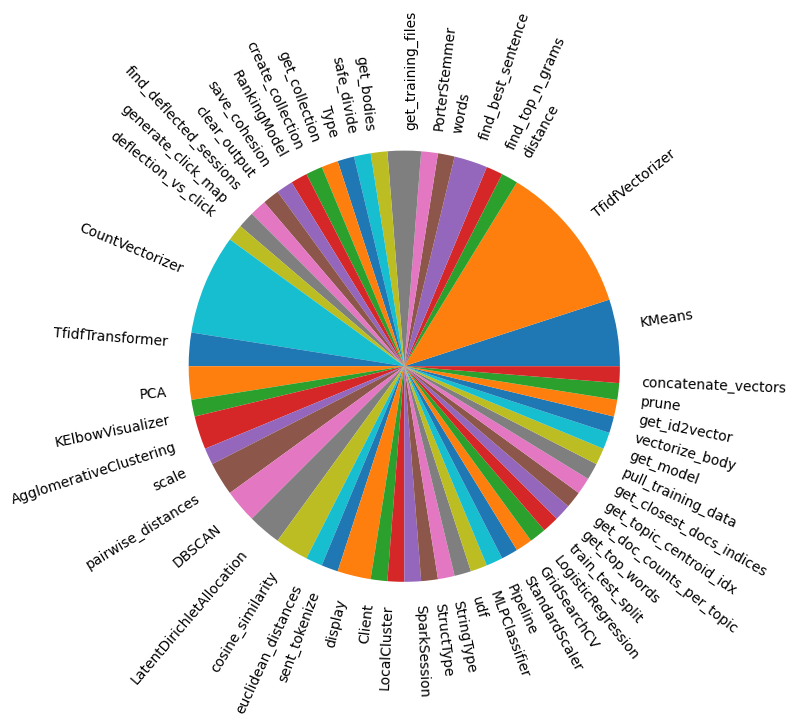

In [28]:
fig = plt.figure(figsize=(10, 7))
plt.pie(import_functions_counts.values(), 
        labels=import_functions_counts.keys(), 
        rotatelabels=True)
plt.savefig("img/import_functions.png")

## Counter of all top-level module imports from all notebooks

In [29]:
toplevel_import_counts = sum([get_notebook_import_modules_counts(notebook) for notebook in notebooks], Counter())
toplevel_import_counts

Counter({'sklearn': 34,
         'pandas': 15,
         'matplotlib': 13,
         'numpy': 11,
         'defaultdict': 9,
         'os': 7,
         'sys': 6,
         'nltk': 6,
         'common': 6,
         'Counter': 5,
         'corpora': 4,
         'topic_modeling': 4,
         'scripts': 4,
         'pyspark': 4,
         'helpers': 4,
         'IPython': 3,
         're': 3,
         'XGMMLReader': 3,
         'metrics': 3,
         'time': 3,
         'csv': 2,
         'math': 2,
         'datetime, timedelta': 2,
         'ITTopicNamer': 2,
         'DataFrameMapper': 2,
         'metrics, pipeline': 2,
         'networkx': 2,
         'RepositoryMining': 2,
         'RepoClusters': 2,
         'plotly': 2,
         'DataFrame': 2,
         'pysolr': 2,
         'IntProgress': 2,
         'dask': 2,
         'scipy': 1,
         'string': 1,
         'experiments': 1,
         'psycopg2': 1,
         'random': 1,
         'OptimalK': 1,
         'yellowbrick': 1,
         

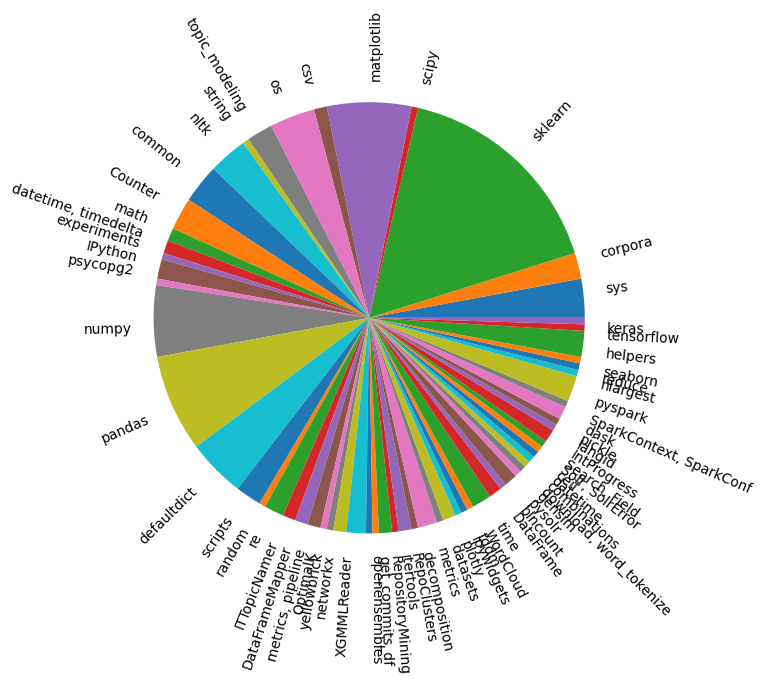

In [38]:
fig = plt.figure(figsize=(10, 7))
plt.pie(toplevel_import_counts.values(), 
        labels=toplevel_import_counts.keys(), 
        rotatelabels=True)
plt.savefig("img/toplevel_imports.png")

That's not the prettiest pie chart considering the cluttered and overlapping labels. Rather than including all of the top-level imports, let's filter out the ones that only occur once.

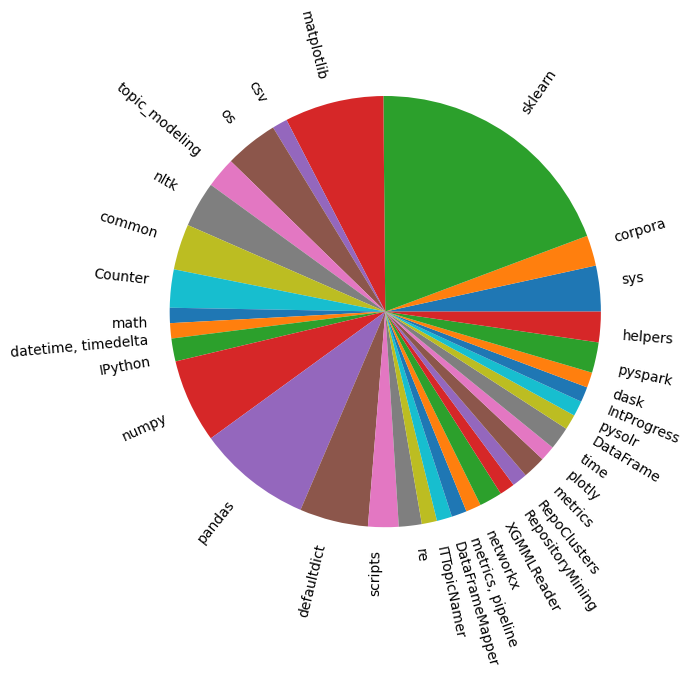

In [39]:
filtered_toplevel_import_counts = {key: value 
                                   for key, value 
                                   in zip(toplevel_import_counts.keys(), toplevel_import_counts.values())
                                   if value > 1}

fig = plt.figure(figsize=(10, 7))
plt.pie(filtered_toplevel_import_counts.values(), 
        labels=filtered_toplevel_import_counts.keys(), 
        rotatelabels=True)
plt.savefig("img/filtered_toplevel_imports.png")

# scraping all defined function names

In [29]:
defined_functions_regex = r'def ([\w_-]*)\('

def get_defined_functions(code_cell):
    return re.findall(defined_functions_regex, code_cell)

In [30]:
get_defined_functions(code_cells[0])

['__init__',
 'is_misspelled',
 'learn_word',
 'learn_words',
 'clean_word',
 'build',
 'find_english_words']

In [31]:
def get_notebook_functions(notebook):
    code_cells = get_code_cells(notebook)
    return list(chain.from_iterable([get_defined_functions(code_cell) for code_cell in code_cells]))

In [32]:
get_notebook_functions(notebook)

['__init__',
 'is_misspelled',
 'learn_word',
 'learn_words',
 'clean_word',
 'build',
 'find_english_words',
 'count_matches',
 '__init__',
 'is_correct',
 'is_all_correct',
 'correct',
 'candidates',
 'known',
 'find_frequency',
 'learn_word',
 'learn_words',
 'clean_word',
 'generate_from_documents',
 'edits1',
 'edits2',
 'tokenize',
 '__init__',
 'load',
 'compute',
 'term_frequency',
 'inverse_document_frequency',
 'get_ids',
 'count_matches']

## Counter for all defined functions within the notebooks
Most of these will be uniquely defined, but a few will have higher counts like `__init__`, which is shared for each of the defined classes.

In [33]:
function_counts = sum([Counter(get_notebook_functions(notebook)) for notebook in notebooks], Counter())
function_counts

Counter({'__init__': 7,
         'get_cluster': 3,
         'show_count_histogram': 3,
         'run': 2,
         'vectorize': 2,
         'export_topics': 2,
         'export_documents': 2,
         'learn_word': 2,
         'learn_words': 2,
         'clean_word': 2,
         'count_matches': 2,
         'load': 2,
         'count': 2,
         'body_length': 2,
         'num_headers': 2,
         'num_urls': 2,
         'num_code_blocks': 2,
         'get_cluster_graph': 2,
         'cluster': 2,
         'n_clusters': 2,
         'add_vectors': 2,
         'find_centroid': 1,
         'get_key_terms': 1,
         'compute_distance': 1,
         'is_misspelled': 1,
         'build': 1,
         'find_english_words': 1,
         'is_correct': 1,
         'is_all_correct': 1,
         'correct': 1,
         'candidates': 1,
         'known': 1,
         'find_frequency': 1,
         'generate_from_documents': 1,
         'edits1': 1,
         'edits2': 1,
         'tokenize': 1,
    

Now I'm wondering, how many of these defined functions are verb phrases? let's use [constituent_treelib](https://github.com/Halvani/Constituent-Treelib/tree/main) to parse these phrases and inspect the presence of verb phrases.

In [34]:
function_phrases = [key.replace("_", " ").strip() for key in function_counts.keys()]
function_phrases

['init',
 'run',
 'vectorize',
 'find centroid',
 'get cluster',
 'get key terms',
 'compute distance',
 'show count histogram',
 'export topics',
 'export documents',
 'is misspelled',
 'learn word',
 'learn words',
 'clean word',
 'build',
 'find english words',
 'count matches',
 'is correct',
 'is all correct',
 'correct',
 'candidates',
 'known',
 'find frequency',
 'generate from documents',
 'edits1',
 'edits2',
 'tokenize',
 'load',
 'compute',
 'term frequency',
 'inverse document frequency',
 'get ids',
 'get sql statement',
 'get date ranges',
 'get pct5s',
 'get error',
 'avg dist to baseline',
 'standard error',
 'standard errors',
 'average significance of difference',
 'confidence interval',
 'generate df row',
 'read topic terms',
 'read csv',
 'read document map',
 'parse doc name',
 'find deflection rates',
 'find click rates',
 'average',
 'show bubbles',
 'export sessions',
 'get repo graph',
 'create adjacency df',
 'get changed filenames',
 'count',
 'body length'

In [35]:
from constituent_treelib import ConstituentTree, BracketedTree, Language, Structure

In [36]:
language = Language.English
nlp = ConstituentTree.create_pipeline(language)

[nltk_data] Downloading package benepar_en3 to
[nltk_data]     /Users/micdrews/Projects/nlp-notebook-
[nltk_data]     portfolio/venv/share/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


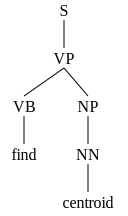

In [37]:
parsed_phrase = ConstituentTree(function_phrases[3], nlp)
parsed_phrase

In [38]:
parsed_phrase.extract_all_phrases()

{'VP': ['find centroid']}

In [39]:
from tqdm.notebook import tqdm

In [53]:
parsed_phrases = []
error_counter = Counter()
for function_phrase in tqdm(function_phrases):
    try:
        parsed_phrases.append(ConstituentTree(function_phrase, nlp).extract_all_phrases())
    except Exception as e:
        error_counter.update([type(e).__name__])
        parsed_phrases.append({})

  0%|          | 0/128 [00:00<?, ?it/s]

In [46]:
parsed_phrases

[{},
 {},
 {},
 {'VP': ['find centroid']},
 {},
 {'NP': ['key terms'], 'VP': ['get key terms']},
 {},
 {'NP': ['count histogram'], 'VP': ['show count histogram']},
 {'NP': ['export topics']},
 {},
 {'VP': ['is misspelled']},
 {},
 {},
 {},
 {},
 {'NP': ['english words'], 'VP': ['find english words']},
 {'S': ['count matches']},
 {'FRAG': ['is correct']},
 {'ADJP': ['all correct'], 'VP': ['is all correct']},
 {},
 {},
 {},
 {'VP': ['find frequency']},
 {'VP': ['generate from documents'], 'PP': ['from documents']},
 {},
 {},
 {},
 {},
 {},
 {'NP': ['term frequency']},
 {},
 {},
 {'NP': ['sql statement'], 'VP': ['get sql statement']},
 {},
 {'VP': ['get pct5s']},
 {},
 {'NP': ['avg dist to baseline'], 'PP': ['to baseline']},
 {},
 {},
 {'NP': ['average significance of difference', 'average significance'],
  'PP': ['of difference']},
 {'NP': ['confidence interval']},
 {},
 {'NP': ['topic terms'], 'VP': ['read topic terms']},
 {'VP': ['read csv']},
 {},
 {},
 {'NP': ['deflection rates'], 'V

In [42]:
Counter(['VP' in parsed_phrase for parsed_phrase in parsed_phrases])

Counter({False: 92, True: 36})

So at least 36 of the 128 function names are verb phrases, though this is a clear underestimate when looking at the list of function names. Given that these are very short phrases without the context of a full sentence being passed to the parser, I'm not surprised that many of these phrases were unable to be parsed or parsed in a way that didn't include a verb phrase.

In [55]:
error_counter

Counter({'LanguageError': 62})

In [58]:
Counter(['VP' in parsed_phrase for parsed_phrase in parsed_phrases if len(parsed_phrase) > 0])

Counter({True: 36, False: 17})

# Counter for NLP Tasks in README.md table

In [2]:
import itertools

First, read in the lines from README.md corresponding to the markdown table of NLP Notebooks, skipping the headers and starting with the first row.

In [3]:
with open("README.md", "r") as text_file:
    md_table = list(itertools.islice(text_file, 7, 22))
md_table

['| [Ticket Clustering](notebooks/Ticket%20Clustering.ipynb) | Dec 2019 | Data Preprocessing, Tokenization, TFIDF, Vectorization, PCA, Clustering, KMeans, Model Evaluation, Visualization  | matplotlib, pandas, numpy, nltk, networkx, sklearn |\n',
 '| [Cluster Exploration](notebooks/Cluster%20Exploration.ipynb) | Dec 2019 | Data Preprocessing, Feature Engineering, Tokenization, TFIDF, Vectorization, PCA, Clustering, KMeans, Model Evaluation, Visualization | matplotlib, networkx, numpy, openensembles, pandas, sklearn  |\n',
 '| [Cluster Commits Summary](notebooks/Cluster%20Commits%20Summary.ipynb) | Dec 2019 | Data Exploration, Vectorization, Clustering | pandas, ipywidgets |\n',
 '| [Retrieving Detailed Commmit Info](notebooks/Retrieving%20Detailed%20Commit%20Info.ipynb) | Dec 2019 | Dataset Creation, Data Preprocessing | networkx, pandas, pydriller |\n',
 '| [Word2Vec Investigation](notebooks/Word2Vec%20Investigation.ipynb) | Nov 2018 | Tokenization, Vectorization, Word2Vec, Question A

Then split each row on the "|" separator to extract just the NLP Tasks column, which can then be split on the ", " separator to create a list of the NLP Tasks from that row. 

In [4]:
nlp_tasks = [row.split("|")[3].strip() for row in md_table]
nlp_tasks

['Data Preprocessing, Tokenization, TFIDF, Vectorization, PCA, Clustering, KMeans, Model Evaluation, Visualization',
 'Data Preprocessing, Feature Engineering, Tokenization, TFIDF, Vectorization, PCA, Clustering, KMeans, Model Evaluation, Visualization',
 'Data Exploration, Vectorization, Clustering',
 'Dataset Creation, Data Preprocessing',
 'Tokenization, Vectorization, Word2Vec, Question Answer Pairing, Dataset Creation, Data Preprocessing, Neural Network Classification, Hyperparameter Optimization, Model Evaluation',
 'Dataset Creation, Tokenization, Vectorization, Word2Vec, Computational Optimization, Neural Network Classification',
 'Question Answer Pairing, Tokenization, Vectorization, Feature Engineering, Model Training, Model Evaluation',
 'Data Preprocessing, Tokenization, Vectorization, TFIDF, Logistic Regression, Model Evaluation, Cross Validation, Visualization',
 'Question Answer Pairing, Tokenization, Vectorization, TFIDF, Model Training, LDA, Clustering, Model Evaluatio

The total counts of NLP Tasks can be computed by creating a Counter for each row split on the ", " and summing the Counters together.

In [7]:
nlp_tasks_ctr = sum([Counter(tasks.split(", ")) for tasks in nlp_tasks], Counter())
nlp_tasks_ctr

Counter({'Tokenization': 12,
         'Vectorization': 12,
         'TFIDF': 9,
         'Model Evaluation': 9,
         'Clustering': 8,
         'Data Preprocessing': 7,
         'Visualization': 7,
         'Dataset Creation': 6,
         'Question Answer Pairing': 5,
         'Model Training': 5,
         'KMeans': 3,
         'Feature Engineering': 3,
         'PCA': 2,
         'Word2Vec': 2,
         'Neural Network Classification': 2,
         'Hyperparameter Optimization': 2,
         'LDA': 2,
         'DBSCAN': 2,
         'Data Exploration': 1,
         'Computational Optimization': 1,
         'Logistic Regression': 1,
         'Cross Validation': 1,
         'Interpretability': 1})

## plotting the NLP Tasks
I want to plot a 2D grid showing each of the notebooks and the corresponding tasks included within the given notebook. I plan on using a CountVectorizer to compute the one-shot vectors indicating which NLP Tasks are included in the given notebook. I'll manually create the vocabulary for this CountVectorizer so that it will only count the specific NLP Tasks.

create a mapping from the NLP Task to an index, will be used as the vocabulary for the `CountVectorizer`.

In [8]:
task2idx = {task: idx for idx, task in enumerate(nlp_tasks_ctr.keys())}

In [9]:
task2idx

{'Data Preprocessing': 0,
 'Tokenization': 1,
 'TFIDF': 2,
 'Vectorization': 3,
 'PCA': 4,
 'Clustering': 5,
 'KMeans': 6,
 'Model Evaluation': 7,
 'Visualization': 8,
 'Feature Engineering': 9,
 'Data Exploration': 10,
 'Dataset Creation': 11,
 'Word2Vec': 12,
 'Question Answer Pairing': 13,
 'Neural Network Classification': 14,
 'Hyperparameter Optimization': 15,
 'Computational Optimization': 16,
 'Model Training': 17,
 'Logistic Regression': 18,
 'Cross Validation': 19,
 'LDA': 20,
 'Interpretability': 21,
 'DBSCAN': 22}

create a mapping from the notebook title to the index, to be used for labeling the 2D plot

In [10]:
import re

In [11]:
titles = [re.findall(r'\[(.*)\]', row)[0] for row in md_table]
titles

['Ticket Clustering',
 'Cluster Exploration',
 'Cluster Commits Summary',
 'Retrieving Detailed Commmit Info',
 'Word2Vec Investigation',
 'Tensorflow RankerNet',
 'Investigating New Features',
 'Classification of Linked vs Unlinked queries',
 'Topic Modeling with LDA - v2',
 'k-means-topic-modeling',
 'Topic modeling on larger datasets',
 'Topic Modeling with LDA',
 'amazon-comprehend-topic-modeling',
 'dbscan-topic-modeling',
 'spell-checking']

In [12]:
title2idx = {title: idx for idx, title in enumerate(titles)}
title2idx

{'Ticket Clustering': 0,
 'Cluster Exploration': 1,
 'Cluster Commits Summary': 2,
 'Retrieving Detailed Commmit Info': 3,
 'Word2Vec Investigation': 4,
 'Tensorflow RankerNet': 5,
 'Investigating New Features': 6,
 'Classification of Linked vs Unlinked queries': 7,
 'Topic Modeling with LDA - v2': 8,
 'k-means-topic-modeling': 9,
 'Topic modeling on larger datasets': 10,
 'Topic Modeling with LDA': 11,
 'amazon-comprehend-topic-modeling': 12,
 'dbscan-topic-modeling': 13,
 'spell-checking': 14}

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer(vocabulary=task2idx, lowercase=False, ngram_range=(1,4))
vectorizer.vocabulary

{'Data Preprocessing': 0,
 'Tokenization': 1,
 'TFIDF': 2,
 'Vectorization': 3,
 'PCA': 4,
 'Clustering': 5,
 'KMeans': 6,
 'Model Evaluation': 7,
 'Visualization': 8,
 'Feature Engineering': 9,
 'Data Exploration': 10,
 'Dataset Creation': 11,
 'Word2Vec': 12,
 'Question Answer Pairing': 13,
 'Neural Network Classification': 14,
 'Hyperparameter Optimization': 15,
 'Computational Optimization': 16,
 'Model Training': 17,
 'Logistic Regression': 18,
 'Cross Validation': 19,
 'LDA': 20,
 'Interpretability': 21,
 'DBSCAN': 22}

In [15]:
task_counts = vectorizer.transform(nlp_tasks).toarray()
task_counts

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0],
       [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
        0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        1],
       [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0

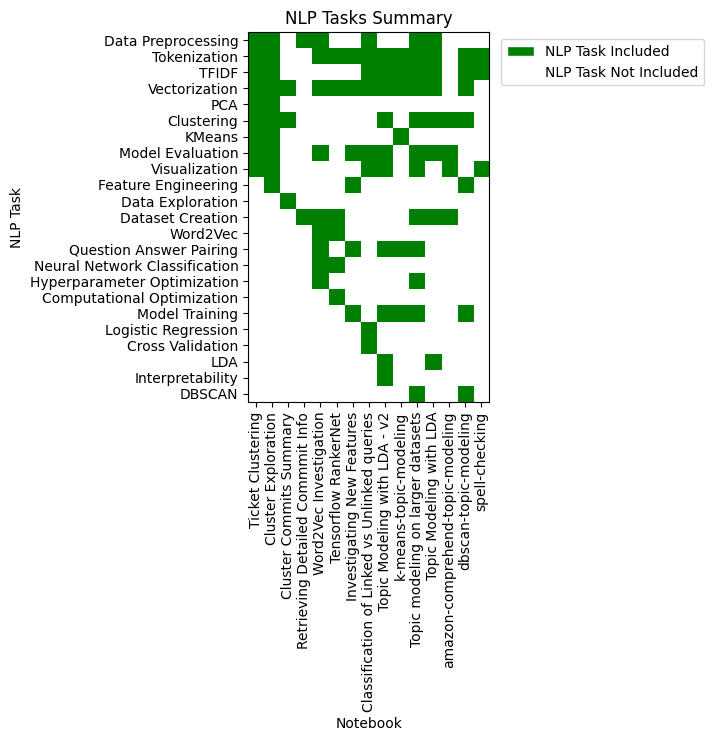

In [19]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

tasks_plot, ax = plt.subplots(1,1)

colors = ['white', 'green']
legend_elements = [Patch(facecolor=color, edgecolor='w') for color in colors]

ax.set_title("NLP Tasks Summary")
tasks_plot = ax.imshow(np.swapaxes(task_counts, 0, 1), cmap=LinearSegmentedColormap.from_list('', colors))

ax.set_ylabel("NLP Task")
ax.set_yticks(range(len(vectorizer.vocabulary.keys())))
ax.set_yticklabels(vectorizer.vocabulary.keys(), fontsize=10)

ax.set_xlabel("Notebook")
ax.set_xticks(range(len(title2idx.keys())))
ax.set_xticklabels(title2idx.keys(), rotation='vertical', fontsize=10)

ax.legend(handles=legend_elements[::-1],
          labels=["NLP Task Included", "NLP Task Not Included"],
          loc="upper left", bbox_to_anchor=[1.02, 1])

plt.savefig('img/tasks_plot.png', bbox_inches="tight")